# Pandas

In [1]:
import pandas as pd
import numpy as np
import warnings

pd.options.display.max_rows = 10
warnings.filterwarnings("ignore")

# 1. Data loading and writing

In [2]:
%%script echo skipping 
pd.read_csv('', header = None, names = [''], index_col = [''], skiprows = [], na_values = [''])
pd.DataFrame([1]).to_csv('', index = False, header = False)

skipping


In [3]:
%%script echo skipping 
with open('') as f:
    # do something

skipping


In [4]:
%%script echo skipping 
pd.read_json('')
pd.DataFrame([1]).to_json()

skipping


In [5]:
%%script echo skipping 
pd.read_html('')
pd.DataFrame([1]).to_html()

skipping


In [6]:
%%script echo skipping 
pd.read_pickle('')
pd.DataFrame([1]).to_pickle()

skipping


In [7]:
%%script echo skipping 
pd.HDFStore('')
pd.read_hdf()
pd.DataFrame([1]).to_hdf()

skipping


In [8]:
%%script echo skipping 
pd.ExcelFile()
pd.read_excel()
pd.DataFrame([1]).to_excel()

skipping


In [9]:
%%script echo skipping 
pd.read_sql('',con)

skipping


In [10]:
%%script echo skipping 
# PyTables 
import tables as tb
tb.open_file()

skipping


In [11]:
%%script echo skipping 
import tstables as tstab 

skipping


# 2. Series

In [12]:
ser = pd.Series([1, 2, 3, 4, 5])
ser

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [13]:
type(ser)

pandas.core.series.Series

In [14]:
ser.values

array([1, 2, 3, 4, 5])

In [15]:
ser.index

RangeIndex(start=0, stop=5, step=1)

In [16]:
ser = pd.Series([1,2,3,4,5], index = ['a','b','c','d','e'])
ser

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [17]:
ser['a']

1

In [18]:
ser[['a','b','c']]

a    1
b    2
c    3
dtype: int64

In [19]:
ser[0:2]

a    1
b    2
dtype: int64

In [20]:
ser[[0,2,1]]

a    1
c    3
b    2
dtype: int64

In [21]:
ser > 3

a    False
b    False
c    False
d     True
e     True
dtype: bool

In [22]:
data = {'a':1, 'b':2, 'c':3, 'd':4, 'e':5}
ser = pd.Series(data)
ser

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [23]:
ser.isnull()

a    False
b    False
c    False
d    False
e    False
dtype: bool

In [24]:
ser1 = pd.Series(data = [1,2,3,4,5], index = ['a','b','c','d','e'])
ser2 = pd.Series(data = [1,2,3,4,5], index = ['b','a','d','c','e'])

In [25]:
ser1 + ser2

a     3
b     3
c     7
d     7
e    10
dtype: int64

In [26]:
ser.name

In [27]:
ser1.index.name

In [28]:
ser.dtype

dtype('int64')

# 3. DataFrame

In [29]:
data = {'state':['Ohio','Ohio','Ohio','Nevada','Nevada','Nevada'],
        'year':[2000,2001,2002,2001,2002,2003],
        'pop':[1.5,1.7,3.6,2.4,2.9,3.2]}
df = pd.DataFrame(data)
df

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [30]:
type(df)

pandas.core.frame.DataFrame

In [31]:
df.index

RangeIndex(start=0, stop=6, step=1)

In [32]:
df.columns

Index(['state', 'year', 'pop'], dtype='object')

In [33]:
df.values

array([['Ohio', 2000, 1.5],
       ['Ohio', 2001, 1.7],
       ['Ohio', 2002, 3.6],
       ['Nevada', 2001, 2.4],
       ['Nevada', 2002, 2.9],
       ['Nevada', 2003, 3.2]], dtype=object)

In [34]:
df['state']

0      Ohio
1      Ohio
2      Ohio
3    Nevada
4    Nevada
5    Nevada
Name: state, dtype: object

In [35]:
df.state

0      Ohio
1      Ohio
2      Ohio
3    Nevada
4    Nevada
5    Nevada
Name: state, dtype: object

In [36]:
df['debt'] = np.arange(6)
df

,state,year,pop,debt
0,Ohio,2000,1.5,0
1,Ohio,2001,1.7,1
2,Ohio,2002,3.6,2
3,Nevada,2001,2.4,3
4,Nevada,2002,2.9,4
5,Nevada,2003,3.2,5


In [37]:
df.T

,0,1,2,3,4,5
state,Ohio,Ohio,Ohio,Nevada,Nevada,Nevada
year,2000,2001,2002,2001,2002,2003
pop,1.5,1.7,3.6,2.4,2.9,3.2
debt,0,1,2,3,4,5


In [38]:
df.T.index

Index(['state', 'year', 'pop', 'debt'], dtype='object')

In [39]:
df.T.columns

RangeIndex(start=0, stop=6, step=1)

In [40]:
df.T.values

array([['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
       [2000, 2001, 2002, 2001, 2002, 2003],
       [1.5, 1.7, 3.6, 2.4, 2.9, 3.2],
       [0, 1, 2, 3, 4, 5]], dtype=object)

In [41]:
df.index.name = 'year'
df.columns.name = 'info'
df

info,state,year,pop,debt
year,,,,
0,Ohio,2000,1.5,0
1,Ohio,2001,1.7,1
2,Ohio,2002,3.6,2
3,Nevada,2001,2.4,3
4,Nevada,2002,2.9,4
5,Nevada,2003,3.2,5


In [42]:
df.values.shape

(6, 4)

# 4. Essentials

## Indexing

In [43]:
ser = pd.Series(range(3), index = ['a','b','c'])
ser

a    0
b    1
c    2
dtype: int64

In [44]:
ser.index

Index(['a', 'b', 'c'], dtype='object')

In [45]:
pd.Index(np.arange(3))

Int64Index([0, 1, 2], dtype='int64')

In [46]:
pd.Index(['a','a','a','b','c'])

Index(['a', 'a', 'a', 'b', 'c'], dtype='object')

## Reindexing

In [47]:
ser = pd.Series([1,2,3,4,5], index = ['a','b','c','d','e'])
ser

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [48]:
ser.reindex(['e','d','c','b','a'])

e    5
d    4
c    3
b    2
a    1
dtype: int64

In [49]:
ser = pd.Series(['a','b','c'], index = [0,2,4])
ser

0    a
2    b
4    c
dtype: object

In [50]:
ser.reindex(range(6))

0      a
1    NaN
2      b
3    NaN
4      c
5    NaN
dtype: object

In [51]:
ser.reindex(range(6), method = 'ffill')

0    a
1    a
2    b
3    b
4    c
5    c
dtype: object

In [52]:
df = pd.DataFrame(np.arange(9).reshape((3, 3)),
                  index = ['a', 'c', 'd'],
                  columns = ['Ohio', 'Texas', 'California'])
df

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [53]:
df.reindex(index = ['d','c','a'])

,Ohio,Texas,California
d,6,7,8
c,3,4,5
a,0,1,2


In [54]:
df.reindex(columns = ['Ohio','California','a','b'])

,Ohio,California,a,b
a,0,2,NaN,NaN
c,3,5,NaN,NaN
d,6,8,NaN,NaN


## Duplicate indexing 

In [55]:
ser = pd.Series(range(5), index = ['a','a','b','b','c'])
ser

a    0
a    1
b    2
b    3
c    4
dtype: int64

In [56]:
ser.index.is_unique

False

In [57]:
ser['a']

a    0
a    1
dtype: int64

In [58]:
df = pd.DataFrame(np.arange(12).reshape(4,3),
                  index = ['a','a','b','b'])
df

,0,1,2
a,0,1,2
a,3,4,5
b,6,7,8
b,9,10,11


In [59]:
df.loc['b']

,0,1,2
b,6,7,8
b,9,10,11


## Hierarchical indexing and level

In [60]:
df = pd.DataFrame(np.arange(12).reshape(4,3),
                  index = [['a','a','b','b'],
                           ['one','two','one','two']],
                  columns = [['A','A','B'],
                             ['C1','B1','A1']])
df

A       B
      C1  B1  A1
a one  0   1   2
  two  3   4   5
b one  6   7   8
  two  9  10  11

In [61]:
df.index

MultiIndex([('a', 'one'),
            ('a', 'two'),
            ('b', 'one'),
            ('b', 'two')],
           )

In [62]:
df.columns

MultiIndex([('A', 'C1'),
            ('A', 'B1'),
            ('B', 'A1')],
           )

In [63]:
df.loc['a','two']

A  C1    3
   B1    4
B  A1    5
Name: (a, two), dtype: int64

In [64]:
df.loc[pd.IndexSlice[:,'two'],['A','B']]

A       B
      C1  B1  A1
a two  3   4   5
b two  9  10  11

In [65]:
df.xs('two', level = 1)

A       B
  C1  B1  A1
a  3   4   5
b  9  10  11

In [66]:
df.index.names = ['index1','index2']

In [67]:
df.columns.names = ['column1','column2']

In [68]:
pd.MultiIndex.from_arrays([['A','A','B'],
                           ['a','b','a']], names = ['one','two'])

MultiIndex([('A', 'a'),
            ('A', 'b'),
            ('B', 'a')],
           names=['one', 'two'])

In [69]:
df.index.levels

FrozenList([['a', 'b'], ['one', 'two']])

In [70]:
df.columns.levels

FrozenList([['A', 'B'], ['A1', 'B1', 'C1']])

In [71]:
df

column1        A       B
column2       C1  B1  A1
index1 index2           
a      one     0   1   2
       two     3   4   5
b      one     6   7   8
       two     9  10  11

In [72]:
df.swaplevel('index2','index1')

column1        A       B
column2       C1  B1  A1
index2 index1           
one    a       0   1   2
two    a       3   4   5
one    b       6   7   8
two    b       9  10  11

In [73]:
df.sort_index(axis = 0, level = 0)

column1        A       B
column2       C1  B1  A1
index1 index2           
a      one     0   1   2
       two     3   4   5
b      one     6   7   8
       two     9  10  11

In [74]:
df.sort_index(axis = 1, level = 1)

column1         B   A   
column2        A1  B1 C1
index1 index2           
a      one      2   1  0
       two      5   4  3
b      one      8   7  6
       two     11  10  9

In [75]:
df.sum(axis = 0, level = 0)

column1   A       B
column2  C1  B1  A1
index1             
a         3   5   7
b        15  17  19

In [76]:
df.sum(axis = 0, level = 'index1')

column1   A       B
column2  C1  B1  A1
index1             
a         3   5   7
b        15  17  19

In [77]:
df = pd.DataFrame({'a':range(7), 
                   'b':range(7,0,-1),
                   'c':['one','one','one','two','two','two','two'],
                   'd':[0,1,2,0,1,2,3]})
df

,a,b,c,d
0,0,7,one,0
1,1,6,one,1
2,2,5,one,2
3,3,4,two,0
4,4,3,two,1
5,5,2,two,2
6,6,1,two,3


In [78]:
df.set_index(['c','d'])

a  b
c   d      
one 0  0  7
    1  1  6
    2  2  5
two 0  3  4
    1  4  3
    2  5  2
    3  6  1

In [79]:
df.set_index(['c','d']).reset_index()

,c,d,a,b
0,one,0,0,7
1,one,1,1,6
2,one,2,2,5
3,two,0,3,4
4,two,1,4,3
5,two,2,5,2
6,two,3,6,1


## Dropping

In [80]:
df = pd.DataFrame(np.arange(16).reshape((4,4)),
                  index = ['a', 'b','c','d'],
                  columns = ['A','B','C','D'])
df

,A,B,C,D
a,0,1,2,3
b,4,5,6,7
c,8,9,10,11
d,12,13,14,15


In [81]:
df.drop(['a','c'], axis = 0)

,A,B,C,D
b,4,5,6,7
d,12,13,14,15


In [82]:
df.drop(['A','D'], axis = 1)

,B,C
a,1,2
b,5,6
c,9,10
d,13,14


## Selecting and filtering

In [83]:
ser = pd.Series(np.arange(4), index = ['a','b','c','d'])
ser

a    0
b    1
c    2
d    3
dtype: int64

In [84]:
ser['b']

1

In [85]:
ser[1]

1

In [86]:
ser[['a','b']]

a    0
b    1
dtype: int64

In [87]:
ser[ser < 2]

a    0
b    1
dtype: int64

In [88]:
df = pd.DataFrame(np.arange(16).reshape((4,4)),
                  index = ['a','b','c','d'],
                  columns = ['A','B','C','D'])
df

,A,B,C,D
a,0,1,2,3
b,4,5,6,7
c,8,9,10,11
d,12,13,14,15


In [89]:
df[['A','D']]

,A,D
a,0,3
b,4,7
c,8,11
d,12,15


In [90]:
df[:2]

,A,B,C,D
a,0,1,2,3
b,4,5,6,7


In [91]:
df[df['C'] > 5]

,A,B,C,D
b,4,5,6,7
c,8,9,10,11
d,12,13,14,15


In [92]:
df.iloc[[2,1],[3,0,1]]

,D,A,B
c,11,8,9
b,7,4,5


In [93]:
df.loc[['c','b'],['D','A','B']]

,D,A,B
c,11,8,9
b,7,4,5


## Arithmetic

In [94]:
ser1 = pd.Series([1,2,3,4,5], index = ['a','b','c','d','e'])
ser2 = pd.Series([5,4,3,2,1], index = ['b','d','e','f','g'])

In [95]:
ser1 + ser2

a    NaN
b    7.0
c    NaN
d    8.0
e    8.0
f    NaN
g    NaN
dtype: float64

In [96]:
df1 = pd.DataFrame(np.arange(9).reshape((3,3)),
                   columns = ['A','B','C'],
                   index = ['a','c','d'])
df2 = pd.DataFrame(np.arange(12).reshape((4,3)),
                   columns = ['C','B','E'],
                   index = ['a','e','f','c'])

In [97]:
df1 + df2

,A,B,C,E
a,NaN,2.0,2.0,NaN
c,NaN,14.0,14.0,NaN
d,NaN,NaN,NaN,NaN
e,NaN,NaN,NaN,NaN
f,NaN,NaN,NaN,NaN


In [98]:
df1.add(df2, fill_value = 0)

,A,B,C,E
a,0.0,2.0,2.0,2.0
c,3.0,14.0,14.0,11.0
d,6.0,7.0,8.0,NaN
e,NaN,4.0,3.0,5.0
f,NaN,7.0,6.0,8.0


In [99]:
df1.rdiv(1)

,A,B,C
a,inf,1.000000,0.500
c,0.333333,0.250000,0.200
d,0.166667,0.142857,0.125


In [100]:
df = pd.DataFrame(np.arange(12).reshape((4,3)),
                  columns = ['A','B','C'],
                  index = ['a','b','c','d'])
df

,A,B,C
a,0,1,2
b,3,4,5
c,6,7,8
d,9,10,11


In [101]:
ser = df.iloc[0]
ser

A    0
B    1
C    2
Name: a, dtype: int64

In [102]:
df - ser

,A,B,C
a,0,0,0
b,3,3,3
c,6,6,6
d,9,9,9


## Functions applying and mapping

In [103]:
df = pd.DataFrame(np.arange(12).reshape(4,3),
                  columns = ['A','B','C'],
                  index = ['a','b','c','d'])
df

,A,B,C
a,0,1,2
b,3,4,5
c,6,7,8
d,9,10,11


In [104]:
np.sqrt(df)

,A,B,C
a,0.000000,1.000000,1.414214
b,1.732051,2.000000,2.236068
c,2.449490,2.645751,2.828427
d,3.000000,3.162278,3.316625


In [105]:
df.apply(lambda x: x.max() - x.min(), axis = 0)

A    9
B    9
C    9
dtype: int64

In [106]:
df.apply(lambda x: x.max() - x.min(), axis = 1)

a    2
b    2
c    2
d    2
dtype: int64

In [107]:
df.applymap(lambda x: '%.2f' % x)

,A,B,C
a,0.00,1.00,2.00
b,3.00,4.00,5.00
c,6.00,7.00,8.00
d,9.00,10.00,11.00


In [108]:
df.applymap(lambda x: x + 1)

,A,B,C
a,1,2,3
b,4,5,6
c,7,8,9
d,10,11,12


In [109]:
df['A'].map(lambda x: x + 1)

a     1
b     4
c     7
d    10
Name: A, dtype: int64

## Sorting and ranking

In [110]:
ser = pd.Series([3,2,4,1], index = ['d','a','b','c'])
ser

d    3
a    2
b    4
c    1
dtype: int64

In [111]:
ser.sort_index()

a    2
b    4
c    1
d    3
dtype: int64

In [112]:
ser.sort_values()

c    1
a    2
d    3
b    4
dtype: int64

In [113]:
df = pd.DataFrame(np.arange(8).reshape(2,4),
                  index = ['B','A'],
                  columns = ['d','a','b','c'])
df

,d,a,b,c
B,0,1,2,3
A,4,5,6,7


In [114]:
df.sort_index(axis = 0, ascending = True)

,d,a,b,c
A,4,5,6,7
B,0,1,2,3


In [115]:
df.sort_values(axis = 0, by = 'b')

,d,a,b,c
B,0,1,2,3
A,4,5,6,7


In [116]:
df.rank(axis = 1, method = 'max', ascending = False)

,d,a,b,c
B,4.0,3.0,2.0,1.0
A,4.0,3.0,2.0,1.0


# 5. Summarizing

## pandas-profiling

In [117]:
import seaborn as sns
df = sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [118]:
# !pip install pandas-profiling
from pandas_profiling import ProfileReport

profile = ProfileReport(df, title="Pandas Profiling Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Statistics

In [119]:
df = pd.DataFrame([[1.4, np.nan],[7.1, -4.5],
                  [np.nan, np.nan],[0.75, -1.3]],
                  index = ['a','b','c','d'],
                  columns = ['one', 'two'])
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, a to d
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   one     3 non-null      float64
 1   two     2 non-null      float64
dtypes: float64(2)
memory usage: 96.0+ bytes


In [121]:
df.describe()

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


In [122]:
df.count(axis = 0)

one    3
two    2
dtype: int64

In [123]:
df.sum(axis = 0)

one    9.25
two   -5.80
dtype: float64

In [124]:
df.mean(axis = 1, skipna = True)

a    1.400
b    1.300
c      NaN
d   -0.275
dtype: float64

In [125]:
df.idxmax()

one    b
two    d
dtype: object

In [126]:
df.cumsum(axis = 0)

,one,two
a,1.40,NaN
b,8.50,-4.5
c,NaN,NaN
d,9.25,-5.8


In [127]:
df.sum().nlargest(5)

one    9.25
two   -5.80
dtype: float64

## Correlation and covariance

In [128]:
df = pd.DataFrame(np.random.randn(32).reshape(8,4),
                  columns = list('ABCD'),
                  index = list('abcdefgh'))
df

,A,B,C,D
a,0.050936,1.716317,0.019832,0.351859
b,1.922469,1.927601,0.315693,0.870073
c,-0.555430,-1.347792,-1.754197,-0.044344
d,1.767937,-0.953626,0.625331,-0.540496
e,-0.067922,-0.148810,0.885382,0.025126
f,-0.387713,1.046048,0.677157,0.822041
g,-0.821168,1.103034,2.037898,-0.784364
h,-0.675467,-0.112584,-0.092845,0.536084


In [129]:
df['A'].corr(df['B'])

0.12226126065143804

In [130]:
df.corr()

,A,B,C,D
A,1.000000,0.122261,0.041260,0.115556
B,0.122261,1.000000,0.452835,0.442519
C,0.041260,0.452835,1.000000,-0.322987
D,0.115556,0.442519,-0.322987,1.000000


In [131]:
df.cov()

,A,B,C,D
A,1.175409,0.161790,0.047975,0.075807
B,0.161790,1.489827,0.592785,0.326831
C,0.047975,0.592785,1.150214,-0.209603
D,0.075807,0.326831,-0.209603,0.366139


In [132]:
df.corrwith(df['A'])

A    1.000000
B    0.122261
C    0.041260
D    0.115556
dtype: float64

## Values and counts

In [133]:
ser = pd.Series(['c','a','d','a','a','b','b','c','c'])
ser

0    c
1    a
2    d
3    a
4    a
5    b
6    b
7    c
8    c
dtype: object

In [134]:
ser.unique()

array(['c', 'a', 'd', 'b'], dtype=object)

In [135]:
ser.value_counts()

c    3
a    3
b    2
d    1
dtype: int64

In [136]:
ser.isin(['b','c'])

0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool

In [137]:
ser[ser.isin(['b','c'])]

0    c
5    b
6    b
7    c
8    c
dtype: object

In [138]:
df = pd.DataFrame({'A':[1,3,4,3,4],
                   'B':[2,3,1,2,3],
                   'C':[1,5,2,4,4]})
df

,A,B,C
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


In [139]:
df.apply(pd.value_counts, axis = 0).fillna(0)

,A,B,C
1,1.0,1.0,1.0
2,0.0,2.0,1.0
3,2.0,2.0,0.0
4,2.0,0.0,2.0
5,0.0,0.0,1.0


# 6. Missing data

In [140]:
ser = pd.Series(['a','b',None,np.nan,pd.NA])
ser

0       a
1       b
2    None
3     NaN
4    <NA>
dtype: object

In [141]:
ser.isnull()

0    False
1    False
2     True
3     True
4     True
dtype: bool

In [142]:
ser.notnull()

0     True
1     True
2    False
3    False
4    False
dtype: bool

In [143]:
ser.dropna()

0    a
1    b
dtype: object

In [144]:
df = pd.DataFrame([[1,2,3],
                   [4,None,None],
                   [None,None,None],
                   [None,5,6]])
df

,0,1,2
0,1.0,2.0,3.0
1,4.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,5.0,6.0


In [145]:
df.dropna(axis = 0, how = 'all')

,0,1,2
0,1.0,2.0,3.0
1,4.0,NaN,NaN
3,NaN,5.0,6.0


In [146]:
df.fillna(value = 0)

,0,1,2
0,1.0,2.0,3.0
1,4.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,5.0,6.0


In [147]:
df.fillna(method = 'ffill')

,0,1,2
0,1.0,2.0,3.0
1,4.0,2.0,3.0
2,4.0,2.0,3.0
3,4.0,5.0,6.0


# 7. Transforming

## Duplicates

In [148]:
df = pd.DataFrame({'A':['one','two'] * 3 + ['two'],
                   'B':[1,1,2,3,3,4,4]})
df

,A,B
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


In [149]:
df.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [150]:
df.drop_duplicates()

,A,B
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


In [151]:
df.drop_duplicates(['A'], keep = 'last')

,A,B
4,one,3
6,two,4


## Mapping

In [152]:
df = pd.DataFrame({'food':['bacon','pulled pork','bacon',
                           'Pastrami','corned beef','Bacon',
                            'pastrami','honey ham','nova lox'],
                   'ounces':[4,3,12,6,7.5,8,3,5,6]})
df

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [153]:
meat_to_animal = {
    'bacon' : 'pig',
    'pulled pork':'pig',
    'pastrami':'cow',
    'corned beef':'cow',
    'honey ham':'pig',
    'nova lox': 'salmon'
}

df['animal'] = df['food'].str.lower().map(meat_to_animal)
df

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


In [154]:
df['food'].map(lambda x: meat_to_animal[x.lower()])

0       pig
1       pig
2       pig
3       cow
4       cow
5       pig
6       cow
7       pig
8    salmon
Name: food, dtype: object

## Replacing

In [155]:
ser = pd.Series([1,2,3,4,5,6,7,8])
ser

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
dtype: int64

In [156]:
ser.replace([2,3], np.nan)

0    1.0
1    NaN
2    NaN
3    4.0
4    5.0
5    6.0
6    7.0
7    8.0
dtype: float64

In [157]:
ser.replace({1:np.nan,
             2:5,
             3:6})

0    NaN
1    5.0
2    6.0
3    4.0
4    5.0
5    6.0
6    7.0
7    8.0
dtype: float64

## Renaming

In [158]:
df = pd.DataFrame(np.arange(12).reshape(3,4),
                  index = ['a','b','c'],
                  columns = ['A','B','C','D'])
df

,A,B,C,D
a,0,1,2,3
b,4,5,6,7
c,8,9,10,11


In [159]:
df.rename(index = {'a':'a1', 
                   'b':'b1',
                   'c':'c1'},
          columns = {'A':'A1',
                     'B':'B1',
                     'C':'C1',
                     'D':'D1'})

,A1,B1,C1,D1
a1,0,1,2,3
b1,4,5,6,7
c1,8,9,10,11


In [160]:
df.rename(index = lambda x: x.upper(),
          columns = lambda x: x.lower())

,a,b,c,d
A,0,1,2,3
B,4,5,6,7
C,8,9,10,11


## Binning

In [161]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]
bins = [18, 25, 35, 60, 100]
cats = pd.cut(ages, 
              bins, 
              right = True,
              labels = None,
              precision = 3)
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64, right]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [162]:
cats.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [163]:
cats.categories

IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]], dtype='interval[int64, right]')

In [164]:
cats.value_counts()

(18, 25]     5
(25, 35]     3
(35, 60]     3
(60, 100]    1
dtype: int64

In [165]:
pd.qcut(ages, 4).value_counts()

(19.999, 22.75]    3
(22.75, 29.0]      3
(29.0, 38.0]       3
(38.0, 61.0]       3
dtype: int64

## Sampling

In [166]:
df = pd.DataFrame(np.arange(20).reshape(5,4))
df

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


In [167]:
df.take(np.random.permutation(5), axis = 0)

,0,1,2,3
3,12,13,14,15
1,4,5,6,7
4,16,17,18,19
2,8,9,10,11
0,0,1,2,3


In [168]:
df.sample(n = 3, axis = 0)

,0,1,2,3
0,0,1,2,3
2,8,9,10,11
3,12,13,14,15


## Dummy variables

In [169]:
df = pd.DataFrame({'key':['b','b','a','c','a','b'],
                   'data':range(6)})
df

,key,data
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [170]:
pd.get_dummies(df['key'], prefix = 'key')

,key_a,key_b,key_c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [171]:
df.join(pd.get_dummies(df['key'], prefix = 'key'))

,key,data,key_a,key_b,key_c
0,b,0,0,1,0
1,b,1,0,1,0
2,a,2,1,0,0
3,c,3,0,0,1
4,a,4,1,0,0
5,b,5,0,1,0


In [172]:
pd.get_dummies(pd.qcut(df['data'], 2))

,"(-0.001, 2.5]","(2.5, 5.0]"
0,1,0
1,1,0
2,1,0
3,0,1
4,0,1
5,0,1


# 8. Merging and combining

## Merge and join

In [173]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': range(7),
                    'common':range(7)})
df1

,key,data1,common
0,b,0,0
1,b,1,1
2,a,2,2
3,c,3,3
4,a,4,4
5,a,5,5
6,b,6,6


In [174]:
df2 = pd.DataFrame({'key': ['a', 'b', 'd'],
                    'data2': range(3),
                    'common':range(3)})
df2

,key,data2,common
0,a,0,0
1,b,1,1
2,d,2,2


In [175]:
pd.merge(left = df1, 
         right = df2, 
         left_on = 'key', 
         right_on = 'key', 
         how = 'inner',
         suffixes = ('_left','_right'),
         left_index = False,
         right_index = False
     )

,key,data1,common_left,data2,common_right
0,b,0,0,1,1
1,b,1,1,1,1
2,b,6,6,1,1
3,a,2,2,0,0
4,a,4,4,0,0
5,a,5,5,0,0


In [176]:
df1 = pd.DataFrame(np.arange(6).reshape(3,2),
                   index = ['a','b','c'],
                   columns = ['A','B'])
df2 = pd.DataFrame(np.arange(6).reshape(3,2),
                   index = ['a','b','c'],
                   columns = ['C','D'])
df3 = pd.DataFrame(np.arange(6).reshape(3,2),
                   index = ['a','b','c'],
                   columns = ['E','F'])

In [177]:
df1.join([df2, df3], how = 'outer')

,A,B,C,D,E,F
a,0,1,0,1,0,1
b,2,3,2,3,2,3
c,4,5,4,5,4,5


## Merge multiple

In [178]:
df1 = pd.DataFrame({'key': ['a', 'b', 'd'],
                    'data1': range(3)})
df2 = pd.DataFrame({'key': ['a', 'b', 'd'],
                    'data2': range(3)})
df3 = pd.DataFrame({'key': ['a', 'b', 'd'],
                    'data3': range(3)})

In [179]:
from functools import reduce

data_frames = [df1, df2, df3]

reduce(lambda left,right: pd.merge(left,
                                   right,
                                   on = 'key',
                                   how = 'outer'), 
                                   data_frames)

,key,data1,data2,data3
0,a,0,0,0
1,b,1,1,1
2,d,2,2,2


## Concat

In [180]:
s1 = pd.Series([0,1], index = ['a','b'])
s2 = pd.Series([2,3,4], index = ['c','d','e'])
s3 = pd.Series([5,6], index = ['f','g'])

In [181]:
pd.concat([s1,s2,s3], 
          axis = 0,
          keys = ['one','two','three'])

one    a    0
       b    1
two    c    2
       d    3
       e    4
three  f    5
       g    6
dtype: int64

In [182]:
pd.concat([s1,s2,s3], 
          axis = 1,
          keys = ['one','two','three'])

,one,two,three
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [183]:
df1 = pd.DataFrame(np.arange(6).reshape(3,2), 
                   index = ['a','b','c'],
                   columns = ['one','two'])
df2 = pd.DataFrame(5 + np.arange(4).reshape(2,2), 
                   index = ['a','c'],
                   columns = ['three','four'])

In [184]:
df1

,one,two
a,0,1
b,2,3
c,4,5


In [185]:
df2

,three,four
a,5,6
c,7,8


In [186]:
pd.concat([df1,df2],
          axis = 0,
          keys = ['level1', 'level2'],
          names = ['upper','lower'])

one  two  three  four
upper  lower                       
level1 a      0.0  1.0    NaN   NaN
       b      2.0  3.0    NaN   NaN
       c      4.0  5.0    NaN   NaN
level2 a      NaN  NaN    5.0   6.0
       c      NaN  NaN    7.0   8.0

In [187]:
pd.concat([df1,df2],
          axis = 1,
          keys = ['level1', 'level2'],
          names = ['upper','lower'])

upper level1     level2     
lower    one two  three four
a          0   1    5.0  6.0
b          2   3    NaN  NaN
c          4   5    7.0  8.0

In [188]:
pd.concat([df1,df2], 
          ignore_index = True)

,one,two,three,four
0,0.0,1.0,NaN,NaN
1,2.0,3.0,NaN,NaN
2,4.0,5.0,NaN,NaN
3,NaN,NaN,5.0,6.0
4,NaN,NaN,7.0,8.0


In [189]:
df1 = pd.DataFrame({'a':[1., np.nan, 5., np.nan],
                    'b':[np.nan, 2., np.nan, 6.],
                    'c':range(2, 18, 4)})
df2 = pd.DataFrame({'a':[5., 4., np.nan, 3., 7.],
                    'b':[np.nan, 3., 4., 6., 8.]})

In [190]:
df1

,a,b,c
0,1.0,NaN,2
1,NaN,2.0,6
2,5.0,NaN,10
3,NaN,6.0,14


In [191]:
df2

,a,b
0,5.0,NaN
1,4.0,3.0
2,NaN,4.0
3,3.0,6.0
4,7.0,8.0


## Combine

In [192]:
df1.combine_first(df2)

,a,b,c
0,1.0,NaN,2.0
1,4.0,2.0,6.0
2,5.0,4.0,10.0
3,3.0,6.0,14.0
4,7.0,8.0,NaN


In [193]:
df1 = pd.DataFrame(np.random.randn(12).reshape(3,4))
df2 = pd.DataFrame(np.random.randn(12).reshape(3,4))

In [194]:
df1

,0,1,2,3
0,0.210255,1.074742,1.195581,0.862363
1,-0.018913,-1.298612,-1.256087,-0.457041
2,0.907759,1.414182,-0.112494,0.787952


In [195]:
df2

,0,1,2,3
0,-2.244657,0.405415,0.518675,0.008576
1,0.038009,-0.253014,0.482717,0.582209
2,1.284408,0.537004,0.220426,-0.122762


In [196]:
df1.combine(df2, func = np.minimum)

,0,1,2,3
0,-2.244657,0.405415,0.518675,0.008576
1,-0.018913,-1.298612,-1.256087,-0.457041
2,0.907759,0.537004,-0.112494,-0.122762


In [197]:
df1.combine(df2, func = lambda x,y: x > y)

,0,1,2,3
0,True,True,True,True
1,False,False,False,False
2,False,True,False,True


# 9. Reshaping and pivoting

## Stack and unstack

In [198]:
df = pd.DataFrame(np.arange(6).reshape((2,3)),
                  index = pd.Index(['a','b'], name = 'index'),
                  columns = pd.Index(['A','B','C'], name = 'column'))
df

column,A,B,C
index,,,
a,0,1,2
b,3,4,5


In [199]:
df.stack(level = -1)

index  column
a      A         0
       B         1
       C         2
b      A         3
       B         4
       C         5
dtype: int64

In [200]:
df.stack(level = -1).unstack(level = 0)

index,a,b
column,,
A,0,3
B,1,4
C,2,5


In [201]:
df.stack('column', dropna = True)

index  column
a      A         0
       B         1
       C         2
b      A         3
       B         4
       C         5
dtype: int64

## Pivot and melt

In [202]:
df = pd.DataFrame({'A':range(9),
                   'B':['one','two','three'] * 3,
                   'C':np.random.randn(9),
                   'D':np.random.randn(9)})
df

,A,B,C,D
0,0,one,-0.270931,-1.404363
1,1,two,2.049531,-0.023910
2,2,three,-0.758506,-1.141998
3,3,one,0.795067,0.235756
4,4,two,-0.038599,-2.701915
5,5,three,-0.883326,0.191837
6,6,one,0.950837,-1.587979
7,7,two,-0.247809,0.422870
8,8,three,-0.683999,1.000825


In [203]:
df.pivot(index = 'A', 
         columns = 'B',
         values = 'C')

B,one,three,two
A,,,
0,-0.270931,NaN,NaN
1,NaN,NaN,2.049531
2,NaN,-0.758506,NaN
3,0.795067,NaN,NaN
4,NaN,NaN,-0.038599
5,NaN,-0.883326,NaN
6,0.950837,NaN,NaN
7,NaN,NaN,-0.247809
8,NaN,-0.683999,NaN


In [204]:
df.pivot(index = 'A',
         columns = 'B', 
         values = ['C','D'])

C                             D                    
B       one     three       two       one     three       two
A                                                            
0 -0.270931       NaN       NaN -1.404363       NaN       NaN
1       NaN       NaN  2.049531       NaN       NaN -0.023910
2       NaN -0.758506       NaN       NaN -1.141998       NaN
3  0.795067       NaN       NaN  0.235756       NaN       NaN
4       NaN       NaN -0.038599       NaN       NaN -2.701915
5       NaN -0.883326       NaN       NaN  0.191837       NaN
6  0.950837       NaN       NaN -1.587979       NaN       NaN
7       NaN       NaN -0.247809       NaN       NaN  0.422870
8       NaN -0.683999       NaN       NaN  1.000825       NaN

In [205]:
df.set_index(['A','B']).unstack(level = 'B')

C                             D                    
B       one     three       two       one     three       two
A                                                            
0 -0.270931       NaN       NaN -1.404363       NaN       NaN
1       NaN       NaN  2.049531       NaN       NaN -0.023910
2       NaN -0.758506       NaN       NaN -1.141998       NaN
3  0.795067       NaN       NaN  0.235756       NaN       NaN
4       NaN       NaN -0.038599       NaN       NaN -2.701915
5       NaN -0.883326       NaN       NaN  0.191837       NaN
6  0.950837       NaN       NaN -1.587979       NaN       NaN
7       NaN       NaN -0.247809       NaN       NaN  0.422870
8       NaN -0.683999       NaN       NaN  1.000825       NaN

In [206]:
df = pd.DataFrame({'key':['one','two','three'],
                   'A':[1,2,3],
                   'B':[4,5,6],
                   'C':[7,8,9]})
df

,key,A,B,C
0,one,1,4,7
1,two,2,5,8
2,three,3,6,9


In [207]:
pd.melt(df, id_vars = ['key'], value_vars = ['A','B','C'])

,key,variable,value
0,one,A,1
1,two,A,2
2,three,A,3
3,one,B,4
4,two,B,5
5,three,B,6
6,one,C,7
7,two,C,8
8,three,C,9


In [208]:
pd.melt(df, id_vars = ['key']).pivot(index = 'key', columns = 'variable', values = 'value').reset_index()

variable,key,A,B,C
0,one,1,4,7
1,three,3,6,9
2,two,2,5,8


# 10. Groupby

## Groupby

In [209]:
df = pd.DataFrame({'key1':['a','a','b','b','a'],
                   'key2':['one','two','one','two','one'],
                   'data1':np.random.randn(5),
                   'data2':np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,-0.927360,0.078760
1,a,two,2.468617,1.893758
2,b,one,2.438368,-0.401698
3,b,two,0.774500,-0.189594
4,a,one,1.411011,0.411964


In [210]:
df.groupby('key1')

In [211]:
dict(list(df.groupby('key1'))).keys()

dict_keys(['a', 'b'])

In [212]:
dict(list(df.groupby('key1'))).values()

dict_values([  key1 key2     data1     data2
0    a  one -0.927360  0.078760
1    a  two  2.468617  1.893758
4    a  one  1.411011  0.411964,   key1 key2     data1     data2
2    b  one  2.438368 -0.401698
3    b  two  0.774500 -0.189594])

In [213]:
df[['data1']].groupby([df['key1'],df['key2']]).mean()

data1
key1 key2          
a    one   0.241826
     two   2.468617
b    one   2.438368
     two   0.774500

In [214]:
df.groupby(['key1','key2']).sum()

data1     data2
key1 key2                    
a    one   0.483652  0.490724
     two   2.468617  1.893758
b    one   2.438368 -0.401698
     two   0.774500 -0.189594

In [215]:
df.groupby(df.dtypes, axis = 1).size()

float64    2
object     2
dtype: int64

In [216]:
df.groupby(['key1','key2'])[['data2']].sum()

data2
key1 key2          
a    one   0.490724
     two   1.893758
b    one  -0.401698
     two  -0.189594

In [217]:
df = pd.DataFrame(np.random.randn(5,5),
                  columns = ['a','b','c','d','e'],
                  index = ['Joe','Steve','Wes','Jim','Travis'])
df.iloc[2:3,[1,2]] = np.nan
df

,a,b,c,d,e
Joe,-0.329807,1.394281,-0.799874,0.717859,-0.040313
Steve,-0.337068,-0.066074,-0.479412,1.466778,0.560064
Wes,-0.782142,NaN,NaN,1.568217,-0.289951
Jim,-1.809644,0.435068,2.968683,-0.668714,-1.621633
Travis,-0.290703,0.761127,2.696048,-0.701615,0.643291


In [218]:
mapping = {'a':'red','b':'red','c':'blue','d':'blue','e':'red','f':'orange'}
df.groupby(mapping, axis = 1).sum()

,blue,red
Joe,-0.082016,1.024162
Steve,0.987366,0.156922
Wes,1.568217,-1.072092
Jim,2.299969,-2.996209
Travis,1.994433,1.113715


In [219]:
df.groupby(len).sum()

,a,b,c,d,e
3,-2.921592,1.829349,2.168809,1.617361,-1.951897
5,-0.337068,-0.066074,-0.479412,1.466778,0.560064
6,-0.290703,0.761127,2.696048,-0.701615,0.643291


In [220]:
mapping = {'joe':'one','Steve':'one','Wes':'two','Jim':'three','Travis':'two'}
df.groupby([len, mapping]).min()

a         b         c         d         e
3 three -1.809644  0.435068  2.968683 -0.668714 -1.621633
  two   -0.782142       NaN       NaN  1.568217 -0.289951
5 one   -0.337068 -0.066074 -0.479412  1.466778  0.560064
6 two   -0.290703  0.761127  2.696048 -0.701615  0.643291

In [221]:
columns = pd.MultiIndex.from_arrays([['US','US','US','JP','JP'],
                                     [1,3,5,1,3]],
                                    names = ['cty','tenor'])
df = pd.DataFrame(np.random.randn(4,5), 
                  columns = columns)
df

cty          US                            JP          
tenor         1         3         5         1         3
0     -0.698397  0.128431 -0.406981  1.363540  0.450348
1     -1.330170  0.902536 -1.016632  1.011606 -2.339903
2      0.651427  0.208245 -1.304850 -2.363858 -0.773358
3      1.858113 -0.652221 -0.218274  0.156582 -1.812159

In [222]:
df.groupby(level = 0, axis = 1).count()

cty,JP,US
0,2,3
1,2,3
2,2,3
3,2,3


In [223]:
%%script echo skipping
df.groupby(pd.Grouper(key = '', level = '', freq = '')).sum()

skipping


## Aggregation

In [224]:
df = pd.DataFrame({'key1':['a','a','b','b','a'],
                   'key2':['one','two','one','two','one'],
                   'data1':np.random.randn(5),
                   'data2':np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,1.464202,0.023166
1,a,two,0.230637,-0.440345
2,b,one,0.940210,-0.039265
3,b,two,0.605406,-0.045494
4,a,one,-0.395564,-2.368711


In [225]:
df.groupby('key1').agg({'data1':[('name_max',max),
                                 ('name_diff', lambda x: x.max() - x.min())],
                        'data2':[('name_min','min'),
                                 ('name_count','count')]})

data1               data2           
      name_max name_diff  name_min name_count
key1                                         
a     1.464202  1.859766 -2.368711          3
b     0.940210  0.334805 -0.045494          2

In [226]:
df.groupby(['key1','key2'], as_index = False).sum()

,key1,key2,data1,data2
0,a,one,1.068638,-2.345545
1,a,two,0.230637,-0.440345
2,b,one,0.940210,-0.039265
3,b,two,0.605406,-0.045494


In [227]:
# SQL: LISTAGG()

df.groupby(['key1']).agg(
    {'key2': 'unique'}
)

,key2
key1,
a,"[one, two]"
b,"[one, two]"


## Filter (HAVING)

In [228]:
df = pd.DataFrame({'key1':['a','a','b'],
                   'data1':np.random.randn(3),
                   'data2':np.random.randn(3)})
df

,key1,data1,data2
0,a,-0.567110,-0.264613
1,a,0.412898,-0.487453
2,b,-0.735031,-0.295262


In [229]:
# SQL: GROUP BY key1 HAVING COUNT(*) > 1 

df.groupby(['key1']).filter(lambda x: len(x) > 1)

,key1,data1,data2
0,a,-0.567110,-0.264613
1,a,0.412898,-0.487453


## Apply

In [230]:
df.groupby('key1').apply(lambda x: x.sort_values(by = 'data1', ascending = True))

key1     data1     data2
key1                           
a    0    a -0.567110 -0.264613
     1    a  0.412898 -0.487453
b    2    b -0.735031 -0.295262

In [231]:
df.groupby('key1', group_keys = False).apply(lambda x: x.sort_values(by = 'data1'))

,key1,data1,data2
0,a,-0.567110,-0.264613
1,a,0.412898,-0.487453
2,b,-0.735031,-0.295262


In [232]:
df = pd.DataFrame({'data1':np.random.randn(1000),
                   'data2':np.random.randn(1000)})
df

,data1,data2
0,0.071660,-0.796468
1,0.411354,1.495836
2,-0.672763,-0.138269
3,-0.847785,1.432029
4,-1.069637,1.908960
...,...,...
995,-0.246289,2.135194
996,-1.039799,-0.135235
997,-0.050958,-0.234460
998,-0.179643,0.424835


In [233]:
df[['data2']].groupby(pd.cut(df['data1'], 4)).apply(lambda x: x.max() - x.min())

,data2
data1,
"(-2.649, -1.013]",4.603929
"(-1.013, 0.617]",6.240658
"(0.617, 2.246]",6.089830
"(2.246, 3.876]",2.101812


In [234]:
df = pd.DataFrame({'key1':['a','a','b','b','a'],
                   'key2':['one','two','one','two','one'],
                   'data1':np.random.randn(5),
                   'data2':np.random.randn(5)})
df.iloc[0,2] = None
df.iloc[3,3] = None
df

,key1,key2,data1,data2
0,a,one,NaN,0.192066
1,a,two,0.376679,-0.526839
2,b,one,1.127481,-3.014134
3,b,two,1.515471,NaN
4,a,one,0.003939,0.517029


In [235]:
df.groupby('key1').apply(lambda x: x.fillna(x.mean()))

key1 key2     data1     data2
key1                                
a    0    a  one  0.190309  0.192066
     1    a  two  0.376679 -0.526839
     4    a  one  0.003939  0.517029
b    2    b  one  1.127481 -3.014134
     3    b  two  1.515471 -3.014134

In [236]:
df.groupby('key1').apply(lambda x: x.sample(1))

,,key1,key2,data1,data2
key1,,,,,
a,1,a,two,0.376679,-0.526839
b,2,b,one,1.127481,-3.014134


In [237]:
df = pd.DataFrame({'key':['a','a','a','a','b','b','b','b'],
                   'data':np.random.randn(8),
                   'weights':np.random.rand(8)})
df

,key,data,weights
0,a,0.489779,0.537391
1,a,0.946587,0.215932
2,a,1.330557,0.353836
3,a,-1.991151,0.934660
4,b,-1.723924,0.662737
5,b,-0.457767,0.189417
6,b,-0.741243,0.288773
7,b,0.635616,0.079812


In [238]:
df.groupby('key').apply(lambda x: np.average(x['data'], 
                                             weights = x['weights']))

key
a   -0.451876
b   -1.140734
dtype: float64

In [239]:
df = pd.DataFrame({'year':[2000,2001,2002,2003,2004] * 20,
                   'A':np.random.randn(100),
                   'B':np.random.randn(100),
                   'C':np.random.randn(100),
                   'D':np.random.randn(100)})
df

,year,A,B,C,D
0,2000,1.289677,1.961324,-0.407007,-0.236794
1,2001,0.157313,-1.011059,-0.604703,-0.331456
2,2002,-0.827254,0.610135,-1.024126,0.454728
3,2003,1.044961,1.931394,0.632944,0.494596
4,2004,-1.259900,1.232762,0.856637,0.402073
...,...,...,...,...,...
95,2000,-0.415609,2.342321,0.140436,0.211726
96,2001,1.187729,-0.359013,-0.464091,-0.626092
97,2002,1.818897,1.065286,-1.309330,1.224932
98,2003,1.367788,-1.764937,1.321239,0.383606


In [240]:
df.groupby('year').apply(lambda x: x['A'].corr(x['B']))

year
2000    0.100521
2001   -0.478237
2002    0.200517
2003   -0.091653
2004   -0.158746
dtype: float64

In [241]:
import statsmodels.api as sm

df.groupby('year').apply(lambda x: sm.OLS(x['A'], x[['B','C','D']]).fit().params)

,B,C,D
year,,,
2000,0.117022,-0.100343,0.072550
2001,-0.564151,-0.540101,-0.155295
2002,0.242966,0.092782,-0.146866
2003,-0.136414,0.149530,0.267420
2004,-0.198023,0.010479,0.176941


## Pivot table and cross tab

In [242]:
df = pd.DataFrame({'key1':['a','a','b','b','a'],
                   'key2':['one','two','one','two','one'],
                   'data1':np.random.randn(5),
                   'data2':np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,1.131487,0.288676
1,a,two,-0.979123,-1.381075
2,b,one,-0.795962,-1.255341
3,b,two,-0.625065,-0.715983
4,a,one,-0.368146,-0.114364


In [243]:
df.pivot_table(index = 'key1', 
               columns = 'key2',
               values = ['data1','data2'],
               aggfunc = ['sum','count'],
               margins = True)

sum                                                   count      \
         data1                         data2                     data1       
key2       one       two       All       one       two       All   one two   
key1                                                                         
a     0.763341 -0.979123 -0.215783  0.174311 -1.381075 -1.206764     2   1   
b    -0.795962 -0.625065 -1.421028 -1.255341 -0.715983 -1.971324     1   1   
All  -0.032621 -1.604189 -1.636810 -1.081029 -2.097059 -3.178088     3   2   

                        
         data2          
key2 All   one two All  
key1                    
a      3     2   1   3  
b      2     1   1   2  
All    5     3   2   5

In [244]:
pd.crosstab(index = df.key1,
            columns = df.key2,
            margins = True)

key2,one,two,All
key1,,,
a,2,1,3
b,1,1,2
All,3,2,5


## Group transforms (Window functions)

In [245]:
df = pd.DataFrame({'key':['a','b','c'] * 4,
                   'value':np.arange(12.)})
df

,key,value
0,a,0.0
1,b,1.0
2,c,2.0
3,a,3.0
4,b,4.0
...,...,...
7,b,7.0
8,c,8.0
9,a,9.0
10,b,10.0


In [246]:
df.groupby('key').mean()

,value
key,
a,4.5
b,5.5
c,6.5


In [247]:
df.groupby('key').transform('mean')

,value
0,4.5
1,5.5
2,6.5
3,4.5
4,5.5
...,...
7,5.5
8,6.5
9,4.5
10,5.5


In [248]:
df.groupby('key').transform(lambda x: x * 2)

,value
0,0.0
1,2.0
2,4.0
3,6.0
4,8.0
...,...
7,14.0
8,16.0
9,18.0
10,20.0


In [249]:
df.groupby('key')[['value']].apply(lambda x: x * 2)

,value
0,0.0
1,2.0
2,4.0
3,6.0
4,8.0
...,...
7,14.0
8,16.0
9,18.0
10,20.0


In [250]:
df.groupby('key').transform(lambda x: x.rank(ascending = False))

,value
0,4.0
1,4.0
2,4.0
3,3.0
4,3.0
...,...
7,2.0
8,2.0
9,1.0
10,1.0


https://stackoverflow.com/questions/27517425/apply-vs-transform-on-a-group-object#:~:text=Two%20major%20differences%20between%20apply%20and%20transform&text=apply%20implicitly%20passes%20all%20the,Series%20to%20the%20custom%20function.

## Grouped time resampling with grouper

In [251]:
df = pd.DataFrame({'time': pd.date_range(start = '2017-05-20 00:00', periods = 15, freq = '1min'),
                   'value': np.arange(15)})
df

,time,value
0,2017-05-20 00:00:00,0
1,2017-05-20 00:01:00,1
2,2017-05-20 00:02:00,2
3,2017-05-20 00:03:00,3
4,2017-05-20 00:04:00,4
...,...,...
10,2017-05-20 00:10:00,10
11,2017-05-20 00:11:00,11
12,2017-05-20 00:12:00,12
13,2017-05-20 00:13:00,13


In [252]:
df.set_index('time').resample(rule = '5min').count()

,value
time,
2017-05-20 00:00:00,5
2017-05-20 00:05:00,5
2017-05-20 00:10:00,5


In [253]:
df = pd.DataFrame({'time': pd.date_range(start = '2017-05-20 00:00', periods = 15, freq = '1min').repeat(3),
                    'key': np.tile(['a', 'b', 'c'], 15),
                    'value': np.arange(45)})
df[:10]

,time,key,value
0,2017-05-20 00:00:00,a,0
1,2017-05-20 00:00:00,b,1
2,2017-05-20 00:00:00,c,2
3,2017-05-20 00:01:00,a,3
4,2017-05-20 00:01:00,b,4
5,2017-05-20 00:01:00,c,5
6,2017-05-20 00:02:00,a,6
7,2017-05-20 00:02:00,b,7
8,2017-05-20 00:02:00,c,8
9,2017-05-20 00:03:00,a,9


In [254]:
(df
 .set_index('time')
 .groupby(['key', pd.Grouper(freq = '5min')])
 .sum())

value
key time                      
a   2017-05-20 00:00:00     30
    2017-05-20 00:05:00    105
    2017-05-20 00:10:00    180
b   2017-05-20 00:00:00     35
    2017-05-20 00:05:00    110
    2017-05-20 00:10:00    185
c   2017-05-20 00:00:00     40
    2017-05-20 00:05:00    115
    2017-05-20 00:10:00    190

## Method chaining and pipe

In [255]:
df = pd.DataFrame({'A':['a','b','c','d'] * 25,
                   'B':np.arange(100),
                   'C':np.random.randn(100)})
df

,A,B,C
0,a,0,0.487240
1,b,1,-1.539601
2,c,2,1.293047
3,d,3,0.318176
4,a,4,-0.638165
...,...,...,...
95,d,95,-1.837472
96,a,96,1.214014
97,b,97,0.943065
98,c,98,0.097585


In [256]:
(df
 [lambda x: x.C > 0]
 .assign(D = df.B * df.C)
 .assign(E = lambda x: x.D - x.D.mean())
 .groupby('A')
 .E
 .sum())

A
a   -116.773709
b     87.907004
c     26.584116
d      2.282589
Name: E, dtype: float64

In [257]:
def a(x):
    return x[x['C'] > 0]
def b(x):
    return x.assign(D = x.B * x.C)
def c(x):
    return x.groupby('A')
def d(x):
    return x.sum()

(df.pipe(a)
   .pipe(b)
   .pipe(c)
   .pipe(d))

,B,C,D
A,,,
a,544,9.095024,344.193799
b,770,10.671501,584.333551
c,662,15.690594,558.469703
d,824,11.540506,569.627214


In [258]:
pd.DataFrame.pipe?

Signature:
pd.DataFrame.pipe(
    self,
    func: 'Callable[..., T] | tuple[Callable[..., T], str]',
    *args,
    **kwargs,
) -> 'T'
Docstring:
Apply func(self, \*args, \*\*kwargs).

Parameters
----------
func : function
    Function to apply to the Series/DataFrame.
    ``args``, and ``kwargs`` are passed into ``func``.
    Alternatively a ``(callable, data_keyword)`` tuple where
    ``data_keyword`` is a string indicating the keyword of
    ``callable`` that expects the Series/DataFrame.
args : iterable, optional
    Positional arguments passed into ``func``.
kwargs : mapping, optional
    A dictionary of keyword arguments passed into ``func``.

Returns
-------
object : the return type of ``func``.

See Also
--------
DataFrame.apply : Apply a function along input axis of DataFrame.
DataFrame.applymap : Apply a function elementwise on a whole DataFrame.
Series.map : Apply a mapping correspondence on a
    :class:`~pandas.Series`.

Notes
-----
Use ``.pipe`` when chaining together fun

# 11. Categorical

In [259]:
pd.Series.cat?

Init signature: pd.Series.cat(data)
Docstring:     
Accessor object for categorical properties of the Series values.

Be aware that assigning to `categories` is a inplace operation, while all
methods return new categorical data per default (but can be called with
`inplace=True`).

Parameters
----------
data : Series or CategoricalIndex

Examples
--------
>>> s = pd.Series(list("abbccc")).astype("category")
>>> s
0    a
1    b
2    b
3    c
4    c
5    c
dtype: category
Categories (3, object): ['a', 'b', 'c']

>>> s.cat.categories
Index(['a', 'b', 'c'], dtype='object')

>>> s.cat.rename_categories(list("cba"))
0    c
1    b
2    b
3    a
4    a
5    a
dtype: category
Categories (3, object): ['c', 'b', 'a']

>>> s.cat.reorder_categories(list("cba"))
0    a
1    b
2    b
3    c
4    c
5    c
dtype: category
Categories (3, object): ['c', 'b', 'a']

>>> s.cat.add_categories(["d", "e"])
0    a
1    b
2    b
3    c
4    c
5    c
dtype: category
Categories (5, object): ['a', 'b', 'c', 'd', 'e'

In [260]:
df = pd.DataFrame({'A': ['one', 'two', 'one', 'one'] * 2,
                   'B': np.arange(8),
                   'C': np.random.randint(3,15,size = 8),
                   'D': np.random.uniform(0,4,size = 8)})
df

,A,B,C,D
0,one,0,12,1.786748
1,two,1,3,3.402915
2,one,2,11,1.288861
3,one,3,14,3.870729
4,one,4,8,2.053430
5,two,5,3,0.650921
6,one,6,4,0.510296
7,one,7,13,2.657888


In [261]:
type(df['A'].values)

numpy.ndarray

In [262]:
A_cat = df['A'].astype(dtype = 'category')
A_cat

0    one
1    two
2    one
3    one
4    one
5    two
6    one
7    one
Name: A, dtype: category
Categories (2, object): ['one', 'two']

In [263]:
A_cat.values.categories

Index(['one', 'two'], dtype='object')

In [264]:
A_cat.values.codes

array([0, 1, 0, 0, 0, 1, 0, 0], dtype=int8)

In [265]:
cat = pd.Categorical(values = ['one','two','one','three','two','one'])
cat

['one', 'two', 'one', 'three', 'two', 'one']
Categories (3, object): ['one', 'three', 'two']

In [266]:
cat.categories

Index(['one', 'three', 'two'], dtype='object')

In [267]:
cat.codes

array([0, 2, 0, 1, 2, 0], dtype=int8)

In [268]:
cat.ordered

False

In [269]:
cat.as_ordered()

['one', 'two', 'one', 'three', 'two', 'one']
Categories (3, object): ['one' < 'three' < 'two']

In [270]:
cat.value_counts()

one      3
three    1
two      2
dtype: int64

In [271]:
cat.unique()

['one', 'two', 'three']
Categories (3, object): ['one', 'three', 'two']

In [272]:
bins = pd.qcut(np.arange(1000), 4)
bins

[(-0.001, 249.75], (-0.001, 249.75], (-0.001, 249.75], (-0.001, 249.75], (-0.001, 249.75], ..., (749.25, 999.0], (749.25, 999.0], (749.25, 999.0], (749.25, 999.0], (749.25, 999.0]]
Length: 1000
Categories (4, interval[float64, right]): [(-0.001, 249.75] < (249.75, 499.5] < (499.5, 749.25] < (749.25, 999.0]]

In [273]:
bins.value_counts()

(-0.001, 249.75]    250
(249.75, 499.5]     250
(499.5, 749.25]     250
(749.25, 999.0]     250
dtype: int64

In [274]:
bins.categories

IntervalIndex([(-0.001, 249.75], (249.75, 499.5], (499.5, 749.25], (749.25, 999.0]], dtype='interval[float64, right]')

In [275]:
bins.codes[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int8)

In [276]:
bins.dtype

CategoricalDtype(categories=[(-0.001, 249.75], (249.75, 499.5], (499.5, 749.25], (749.25, 999.0]], ordered=True)

In [277]:
(pd.Series(np.arange(1000))
   .groupby(bins)
   .agg(['count','min','max'])
   .reset_index())

,index,count,min,max
0,"(-0.001, 249.75]",250,0,249
1,"(249.75, 499.5]",250,250,499
2,"(499.5, 749.25]",250,500,749
3,"(749.25, 999.0]",250,750,999


In [278]:
cat = pd.Series(['a','b','c','d'] * 2).astype(dtype = 'category')
cat

0    a
1    b
2    c
3    d
4    a
5    b
6    c
7    d
dtype: category
Categories (4, object): ['a', 'b', 'c', 'd']

In [279]:
cat.cat.codes

0    0
1    1
2    2
3    3
4    0
5    1
6    2
7    3
dtype: int8

In [280]:
cat.values.codes

array([0, 1, 2, 3, 0, 1, 2, 3], dtype=int8)

In [281]:
cat.cat.categories

Index(['a', 'b', 'c', 'd'], dtype='object')

In [282]:
cat.cat.set_categories(['a','b','c','d','e'])

0    a
1    b
2    c
3    d
4    a
5    b
6    c
7    d
dtype: category
Categories (5, object): ['a', 'b', 'c', 'd', 'e']

In [283]:
cat.isin(['a','b'])

0     True
1     True
2    False
3    False
4     True
5     True
6    False
7    False
dtype: bool

In [284]:
cat.cat.remove_unused_categories()

0    a
1    b
2    c
3    d
4    a
5    b
6    c
7    d
dtype: category
Categories (4, object): ['a', 'b', 'c', 'd']

In [285]:
pd.get_dummies(cat)

,a,b,c,d
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0
5,0,1,0,0
6,0,0,1,0
7,0,0,0,1


# 12. Date and time

## datetime

In [286]:
pd.Series.dt?

Init signature: pd.Series.dt(data: 'Series')
Docstring:     
Accessor object for datetimelike properties of the Series values.

Examples
--------
>>> seconds_series = pd.Series(pd.date_range("2000-01-01", periods=3, freq="s"))
>>> seconds_series
0   2000-01-01 00:00:00
1   2000-01-01 00:00:01
2   2000-01-01 00:00:02
dtype: datetime64[ns]
>>> seconds_series.dt.second
0    0
1    1
2    2
dtype: int64

>>> hours_series = pd.Series(pd.date_range("2000-01-01", periods=3, freq="h"))
>>> hours_series
0   2000-01-01 00:00:00
1   2000-01-01 01:00:00
2   2000-01-01 02:00:00
dtype: datetime64[ns]
>>> hours_series.dt.hour
0    0
1    1
2    2
dtype: int64

>>> quarters_series = pd.Series(pd.date_range("2000-01-01", periods=3, freq="q"))
>>> quarters_series
0   2000-03-31
1   2000-06-30
2   2000-09-30
dtype: datetime64[ns]
>>> quarters_series.dt.quarter
0    1
1    2
2    3
dtype: int64

Returns a Series indexed like the original Series.
Raises TypeError if the Series does not contain datetimelike

In [287]:
from datetime import datetime 

In [288]:
datetime.now()

datetime.datetime(2021, 11, 21, 10, 0, 54, 126466)

In [289]:
datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)

datetime.timedelta(days=926, seconds=56700)

In [290]:
datetime(2011,1,3).strftime('%Y-%m-%d')

'2011-01-03'

In [291]:
datetime.strptime('2011-01-03', '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [292]:
from dateutil.parser import parse
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

## Parsing

In [293]:
pd.to_datetime('2011-07-06 12:00:00')

Timestamp('2011-07-06 12:00:00')

In [294]:
pd.to_datetime([None])

DatetimeIndex(['NaT'], dtype='datetime64[ns]', freq=None)

In [295]:
dates = [datetime(2011,1,2), datetime(2011,1,5),
         datetime(2011,1,7), datetime(2011,1,8),
         datetime(2011,1,10), datetime(2011,1,12)]
ts = pd.Series(np.random.randn(6), index = dates)
ts

2011-01-02    0.289599
2011-01-05    0.622235
2011-01-07    0.692613
2011-01-08   -0.524048
2011-01-10   -0.031001
2011-01-12   -0.741933
dtype: float64

In [296]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

## Indexing, selecting and subseting

In [297]:
ts = pd.Series(np.random.randn(1000), 
               index = pd.date_range('1/1/2000', periods = 1000))
ts

2000-01-01   -0.411213
2000-01-02   -0.542504
2000-01-03   -0.781992
2000-01-04   -0.640840
2000-01-05    0.736495
                ...   
2002-09-22   -1.420241
2002-09-23   -0.130399
2002-09-24   -1.062011
2002-09-25   -0.012340
2002-09-26    2.166404
Freq: D, Length: 1000, dtype: float64

In [298]:
ts['20020110']

0.19692380527686457

In [299]:
ts['1/10/2002']

0.19692380527686457

In [300]:
ts['2001']

2001-01-01    0.643069
2001-01-02    0.694743
2001-01-03    0.532044
2001-01-04   -0.535413
2001-01-05    0.766900
                ...   
2001-12-27   -0.032643
2001-12-28    1.495699
2001-12-29   -0.567918
2001-12-30   -0.665040
2001-12-31   -0.398787
Freq: D, Length: 365, dtype: float64

In [301]:
ts['2001-05']

2001-05-01    1.658143
2001-05-02    0.377431
2001-05-03    0.588253
2001-05-04    2.216291
2001-05-05   -1.340110
                ...   
2001-05-27    0.594765
2001-05-28   -1.225387
2001-05-29    2.212649
2001-05-30    0.709305
2001-05-31    1.178271
Freq: D, Length: 31, dtype: float64

In [302]:
ts['1/6/2001':'1/10/2001']

2001-01-06   -0.289012
2001-01-07    0.013874
2001-01-08   -0.253701
2001-01-09   -1.514178
2001-01-10   -0.754067
Freq: D, dtype: float64

In [303]:
%%script echo skipping
ts.truncate(before = '1/5/2011', after = '1/9/2011', copy = True)

skipping


In [304]:
ts.loc['5-2001']

2001-05-01    1.658143
2001-05-02    0.377431
2001-05-03    0.588253
2001-05-04    2.216291
2001-05-05   -1.340110
                ...   
2001-05-27    0.594765
2001-05-28   -1.225387
2001-05-29    2.212649
2001-05-30    0.709305
2001-05-31    1.178271
Freq: D, Length: 31, dtype: float64

In [305]:
dates = pd.DatetimeIndex(['1/1/2000','1/2/2000','1/2/2000','1/2/2000','1/3/2000'])
ts = pd.Series(np.arange(5), index = dates)
ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

In [306]:
ts['1/2/2000']

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

In [307]:
ts.groupby(level = 0).count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

## Timestamp

In [308]:
pd.Timestamp('2000-01-01 00:00:00')

Timestamp('2000-01-01 00:00:00')

In [309]:
pd.to_datetime('2000-01-01 00:00:00')

Timestamp('2000-01-01 00:00:00')

## Date ranges (index)

In [310]:
type(pd.date_range('2000-01-01', periods = 2))

pandas.core.indexes.datetimes.DatetimeIndex

In [311]:
pd.date_range(start = '2012-04-01', 
              end = '2012-06-01',
              freq = 'D')

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

## Frequencies

In [312]:
pd.date_range(start = '2000-01-01',
              periods = 5,
              freq = '4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [313]:
pd.date_range(start = '2000-01-01',
              periods = 5,
              freq = 'WOM-3FRI')

DatetimeIndex(['2000-01-21', '2000-02-18', '2000-03-17', '2000-04-21',
               '2000-05-19'],
              dtype='datetime64[ns]', freq='WOM-3FRI')

## Shifting

In [314]:
ts = pd.Series(np.random.randn(4),
               index = pd.date_range('1/1/2000', periods = 4, freq = 'M'))
ts

2000-01-31   -1.025924
2000-02-29   -1.432555
2000-03-31    0.627477
2000-04-30   -1.068119
Freq: M, dtype: float64

In [315]:
ts.shift(periods = 2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31   -1.025924
2000-04-30   -1.432555
Freq: M, dtype: float64

In [316]:
ts.shift(periods = 2, freq = 'D')

2000-02-02   -1.025924
2000-03-02   -1.432555
2000-04-02    0.627477
2000-05-02   -1.068119
dtype: float64

## Time zone

In [317]:
import pytz
pytz.timezone('America/New_York')

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

In [318]:
rng = pd.date_range('3/9/2012 9:30', 
                    periods = 6, 
                    freq = 'D',
                    tz = None)
ts = pd.Series(np.random.randn(len(rng)), 
               index = rng)
ts

2012-03-09 09:30:00    0.487951
2012-03-10 09:30:00   -0.764966
2012-03-11 09:30:00   -0.257730
2012-03-12 09:30:00   -0.082710
2012-03-13 09:30:00   -0.810542
2012-03-14 09:30:00    1.501013
Freq: D, dtype: float64

In [319]:
print(ts.index.tz)

None


In [320]:
ts.tz_localize('UTC')

2012-03-09 09:30:00+00:00    0.487951
2012-03-10 09:30:00+00:00   -0.764966
2012-03-11 09:30:00+00:00   -0.257730
2012-03-12 09:30:00+00:00   -0.082710
2012-03-13 09:30:00+00:00   -0.810542
2012-03-14 09:30:00+00:00    1.501013
Freq: D, dtype: float64

In [321]:
ts.tz_localize('UTC').index.tz

<UTC>

In [322]:
ts.tz_localize('UTC').tz_convert(tz = 'America/New_York').index.tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

In [323]:
pd.Timestamp('2011-03-12 04:00').tz_localize(tz = 'UTC')

Timestamp('2011-03-12 04:00:00+0000', tz='UTC')

In [324]:
pd.Timestamp('2011-03-12 04:00').tz_localize(tz = 'UTC').tz_convert(tz = 'America/New_York')

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [325]:
pd.Timestamp('2011-03-12 04:00', tz = 'UTC').tz_convert(tz = 'America/New_York')

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [326]:
ts1 = ts.tz_localize('Europe/London')
ts1

2012-03-09 09:30:00+00:00    0.487951
2012-03-10 09:30:00+00:00   -0.764966
2012-03-11 09:30:00+00:00   -0.257730
2012-03-12 09:30:00+00:00   -0.082710
2012-03-13 09:30:00+00:00   -0.810542
2012-03-14 09:30:00+00:00    1.501013
dtype: float64

In [327]:
ts2 = ts.tz_localize('Europe/Moscow')
ts2

2012-03-09 09:30:00+04:00    0.487951
2012-03-10 09:30:00+04:00   -0.764966
2012-03-11 09:30:00+04:00   -0.257730
2012-03-12 09:30:00+04:00   -0.082710
2012-03-13 09:30:00+04:00   -0.810542
2012-03-14 09:30:00+04:00    1.501013
dtype: float64

In [328]:
(ts1 + ts2).index.tz

<UTC>

## Periods

In [329]:
p = pd.Period(value = 2007, freq = 'A-DEC')
p

Period('2007', 'A-DEC')

In [330]:
type(p)

pandas._libs.tslibs.period.Period

In [331]:
p + 5

Period('2012', 'A-DEC')

In [332]:
pd.Period(value = '2014', freq = 'A-DEC') - p

<7 * YearEnds: month=12>

In [333]:
rng = pd.period_range(start = '2000-01-01',
                      end = '2000-06-30',
                      freq = 'M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]')

In [334]:
type(rng)

pandas.core.indexes.period.PeriodIndex

In [335]:
pd.Series(np.random.randn(6), index = rng)

2000-01   -1.027466
2000-02    2.049791
2000-03    0.674947
2000-04    0.434180
2000-05   -0.111002
2000-06    0.722303
Freq: M, dtype: float64

In [336]:
pd.PeriodIndex(['2001Q3','2002Q2','2003Q1'], freq = 'Q-DEC')

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]')

In [337]:
p = pd.Period(value = '2007', freq = 'A-DEC')
p

Period('2007', 'A-DEC')

In [338]:
p.asfreq(freq = 'M', how = 'start')

Period('2007-01', 'M')

In [339]:
p.asfreq(freq = 'M', how = 'end')

Period('2007-12', 'M')

In [340]:
rng = pd.period_range(start = '2006',
                      end = '2009',
                      freq = 'A-DEC')
rng

PeriodIndex(['2006', '2007', '2008', '2009'], dtype='period[A-DEC]')

In [341]:
ts = pd.Series(np.random.randn(len(rng)), index = rng)
ts

2006   -0.848712
2007    0.752471
2008    0.381794
2009   -1.159649
Freq: A-DEC, dtype: float64

In [342]:
ts.index

PeriodIndex(['2006', '2007', '2008', '2009'], dtype='period[A-DEC]')

In [343]:
ts.asfreq(freq = 'M', how = 'start')

2006-01   -0.848712
2007-01    0.752471
2008-01    0.381794
2009-01   -1.159649
Freq: M, dtype: float64

In [344]:
ts.asfreq(freq = 'M', how = 'end')

2006-12   -0.848712
2007-12    0.752471
2008-12    0.381794
2009-12   -1.159649
Freq: M, dtype: float64

## Timestamp and period

In [345]:
rng = pd.date_range(start = '2000-01-01', 
                    periods = 3, 
                    freq = 'M')
ts = pd.Series(np.random.randn(3), index = rng)
ts

2000-01-31    0.733757
2000-02-29    1.090794
2000-03-31    0.427222
Freq: M, dtype: float64

In [346]:
ts.index

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31'], dtype='datetime64[ns]', freq='M')

In [347]:
ts.to_period()

2000-01    0.733757
2000-02    1.090794
2000-03    0.427222
Freq: M, dtype: float64

In [348]:
ts.to_period().index

PeriodIndex(['2000-01', '2000-02', '2000-03'], dtype='period[M]')

In [349]:
rng = pd.date_range('1/29/2000', periods = 6, freq = 'D')
ts = pd.Series(np.random.randn(6), index = rng)
ts

2000-01-29    0.228113
2000-01-30    1.183689
2000-01-31    0.206929
2000-02-01   -1.879701
2000-02-02    0.752391
2000-02-03   -0.082860
Freq: D, dtype: float64

In [350]:
ts.to_period(freq = 'M')

2000-01    0.228113
2000-01    1.183689
2000-01    0.206929
2000-02   -1.879701
2000-02    0.752391
2000-02   -0.082860
Freq: M, dtype: float64

In [351]:
ts.to_period(freq = 'D').to_timestamp(how = 'end')

2000-01-29 23:59:59.999999999    0.228113
2000-01-30 23:59:59.999999999    1.183689
2000-01-31 23:59:59.999999999    0.206929
2000-02-01 23:59:59.999999999   -1.879701
2000-02-02 23:59:59.999999999    0.752391
2000-02-03 23:59:59.999999999   -0.082860
Freq: D, dtype: float64

## Resampling

In [352]:
rng = pd.date_range('2000-01-01',
                    periods = 100,
                    freq = 'D')
ts = pd.Series(np.random.randn(len(rng)), index = rng)
ts

2000-01-01    0.516151
2000-01-02   -2.099583
2000-01-03   -0.516300
2000-01-04    0.027104
2000-01-05   -0.389748
                ...   
2000-04-05    0.699623
2000-04-06   -1.459667
2000-04-07    0.797819
2000-04-08    3.936780
2000-04-09   -1.845184
Freq: D, Length: 100, dtype: float64

In [353]:
ts.resample(rule = 'M')

In [354]:
ts.resample(rule = 'M').count()

2000-01-31    31
2000-02-29    29
2000-03-31    31
2000-04-30     9
Freq: M, dtype: int64

In [355]:
ts.resample(rule = 'M', kind = 'period').mean()

2000-01   -0.362479
2000-02   -0.232039
2000-03    0.043127
2000-04    0.528244
Freq: M, dtype: float64

In [356]:
ts.resample(rule = 'M', kind = 'timestamp').sum()

2000-01-31   -11.236834
2000-02-29    -6.729127
2000-03-31     1.336946
2000-04-30     4.754196
Freq: M, dtype: float64

In [357]:
rng = pd.date_range('2000-01-01', periods = 12, freq = 'T')
ts = pd.Series(np.arange(12), index = rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
                       ..
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, Length: 12, dtype: int64

In [358]:
ts.resample(rule = '5min', 
            closed = 'right',
            label = 'right',
            loffset = '-1s').sum()

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int64

In [359]:
ts.resample(rule = '5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


In [360]:
df = pd.DataFrame(np.random.randn(2,4),
                  index = pd.date_range('1/1/2000', periods = 2, freq = 'W-WED'),
                  columns = ['A', 'B', 'C', 'D'])
df

,A,B,C,D
2000-01-05,-1.040561,0.319131,1.042830,0.179471
2000-01-12,0.285063,0.212316,1.496199,0.215589


In [361]:
df.resample(rule = 'D').asfreq()

,A,B,C,D
2000-01-05,-1.040561,0.319131,1.042830,0.179471
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.285063,0.212316,1.496199,0.215589


In [362]:
df.resample(rule = 'D').ffill()

,A,B,C,D
2000-01-05,-1.040561,0.319131,1.042830,0.179471
2000-01-06,-1.040561,0.319131,1.042830,0.179471
2000-01-07,-1.040561,0.319131,1.042830,0.179471
2000-01-08,-1.040561,0.319131,1.042830,0.179471
2000-01-09,-1.040561,0.319131,1.042830,0.179471
2000-01-10,-1.040561,0.319131,1.042830,0.179471
2000-01-11,-1.040561,0.319131,1.042830,0.179471
2000-01-12,0.285063,0.212316,1.496199,0.215589


In [363]:
df = pd.DataFrame(np.random.randn(24,4),
                  index = pd.period_range('1-2000', '12-2001', freq = 'M'),
                  columns = ['A', 'B', 'C', 'D'])
df.head()

,A,B,C,D
2000-01,-0.409068,0.011041,-0.267931,-0.037583
2000-02,-0.628665,1.421499,-0.304237,0.371730
2000-03,-1.043457,-0.672795,-1.725774,0.434796
2000-04,-2.372376,-0.148492,0.192405,0.084987
2000-05,1.953399,0.675185,-0.508478,1.150049


In [364]:
df.resample(rule = 'A-DEC').mean()

,A,B,C,D
2000,-0.04764,-0.009035,-0.151464,0.106527
2001,-0.33509,0.410152,0.340965,0.327636


In [365]:
df.resample(rule = 'A-DEC').mean().resample('Q-DEC', convention = 'end').asfreq()

,A,B,C,D
2000Q4,-0.04764,-0.009035,-0.151464,0.106527
2001Q1,NaN,NaN,NaN,NaN
2001Q2,NaN,NaN,NaN,NaN
2001Q3,NaN,NaN,NaN,NaN
2001Q4,-0.33509,0.410152,0.340965,0.327636


## Moving time window

In [366]:
df = pd.DataFrame({'A':np.random.normal(size = 100),
                   'B':np.random.normal(size = 100),
                   'C':np.random.normal(size = 100)},
                  index = pd.date_range(start = '2000-01-01', 
                                        periods = 100, 
                                        freq = 'D'))
df

,A,B,C
2000-01-01,-0.528534,-1.583414,0.310071
2000-01-02,1.217089,0.178246,0.082427
2000-01-03,0.195142,1.626019,-3.413929
2000-01-04,-0.887211,-0.884574,-2.031654
2000-01-05,0.365294,1.022020,-1.100605
...,...,...,...
2000-04-05,-0.267585,-0.475449,-0.059810
2000-04-06,0.436351,1.718771,-0.601197
2000-04-07,1.022364,0.286897,1.615563
2000-04-08,-1.305567,-1.019267,0.473888


In [367]:
df.rolling(window = 20)

Rolling [window=20,center=False,axis=0,method=single]

In [368]:
df['A'].plot()
df['A'].rolling(window = 20, min_periods = 5).mean().plot()

<AxesSubplot:>

In [369]:
df['A'].rolling(window = 10).mean().plot(color = 'blue')
df['A'].ewm(span = 10).mean().plot(color = 'red')
df['A'].expanding().mean().plot(color = 'green')

<AxesSubplot:>

In [370]:
df['A'].rolling(window = 10).corr(df['B']).plot()

<AxesSubplot:>

In [371]:
df.pct_change()

,A,B,C
2000-01-01,NaN,NaN,NaN
2000-01-02,-3.302765,-1.112571,-0.734166
2000-01-03,-0.839665,8.122343,-42.417377
2000-01-04,-5.546486,-1.544012,-0.404893
2000-01-05,-1.411733,-2.155381,-0.458272
...,...,...,...
2000-04-05,-0.887506,-1.481403,-1.163862
2000-04-06,-2.630700,-4.615052,9.051738
2000-04-07,1.342988,-0.833080,-3.687243
2000-04-08,-2.277007,-4.552733,-0.706673


In [372]:
df.diff().mean()

A    0.001909
B    0.020140
C   -0.001541
dtype: float64

In [373]:
df.rolling(window = 10).apply(lambda x: x.max() - x.min()).plot()

<AxesSubplot:>

# 13. Strings

In [374]:
pd.Series.str?

Init signature: pd.Series.str(data)
Docstring:     
Vectorized string functions for Series and Index.

NAs stay NA unless handled otherwise by a particular method.
Patterned after Python's string methods, with some inspiration from
R's stringr package.

Examples
--------
>>> s = pd.Series(["A_Str_Series"])
>>> s
0    A_Str_Series
dtype: object

>>> s.str.split("_")
0    [A, Str, Series]
dtype: object

>>> s.str.replace("_", "")
0    AStrSeries
dtype: object
File:           ~/opt/anaconda3/lib/python3.8/site-packages/pandas/core/strings/accessor.py
Type:           type
Subclasses:     


In [375]:
import re
data = {'Dave': 'dave@google.com', 
        'Steve': 'steve@gmail.com',
        'Rob': 'rob@gmail.com', 
        'Wes': np.nan}

df = pd.Series(data)
df

Dave     dave@google.com
Steve    steve@gmail.com
Rob        rob@gmail.com
Wes                  NaN
dtype: object

In [376]:
df.str

In [377]:
df.str.contains('gmail')

Dave     False
Steve     True
Rob       True
Wes        NaN
dtype: object

In [378]:
pattern = r'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})'

In [379]:
df.str.findall(pattern, flags = re.IGNORECASE)

Dave     [(dave, google, com)]
Steve    [(steve, gmail, com)]
Rob        [(rob, gmail, com)]
Wes                        NaN
dtype: object

In [380]:
df.str.match(pattern, flags = re.IGNORECASE)

Dave     True
Steve    True
Rob      True
Wes       NaN
dtype: object

# 14. Visualization

## Setting 

In [381]:
%matplotlib inline 

In [382]:
import matplotlib.pyplot as plt
import seaborn as sns

In [383]:
%%script echo skipping
plt.rc('figure', figsize = (5,5))

skipping


In [384]:
%%script echo skipping
font_option = {'family':'monospace',
               'weight':'bold',
               'size':'small'}

plt.rc('font', **font_options)

skipping


In [385]:
%%script echo skipping
plt.rcParams.update(plt.rcParamsDefault)

skipping


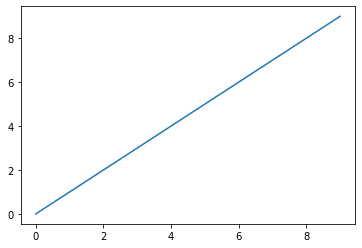

In [386]:
plt.plot(np.arange(10))

## matplotlib

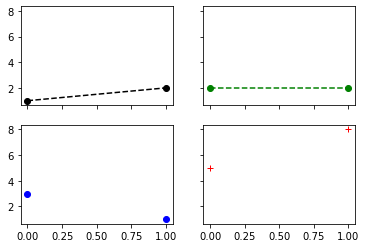

In [387]:
fig, ax = plt.subplots(nrows = 2, 
                       ncols = 2,
                       sharex = True,
                       sharey = True)
ax[0,0].plot([1,2],'ko--')
ax[0,1].plot([2,2],'go--')
ax[1,0].plot([3,1],'bo')
ax[1,1].plot([5,8],'r+')

In [388]:
type(ax)

numpy.ndarray

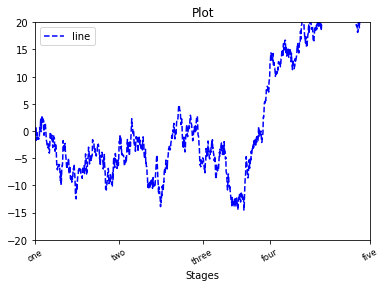

In [389]:
fig, ax = plt.subplots()

ax.plot(np.random.randn(1000).cumsum(),
         'b--',
         label = 'line')

ax.legend(loc = 'best')

ax.set_xticks([0,250,500,750,1000])
ax.set_xticklabels(['one','two','three','four','five'],
                     rotation = 30,
                     fontsize = 'small')
ax.set_xlim([10, 900])
ax.set_ylim([-20, 20])

ax.set_title('Cumsum plot')

ax.set_xlabel('Stages')

prop = {
    'title':'Plot',
    'xlabel':'Stages',
    'xticks':[0,250,500,700,1000],
    'xticklabels':['one','two','three','four','five']
}

ax.set(**prop)

plt.savefig('plot.png', dpi = 400)

## pandas methods

In [390]:
df = pd.DataFrame(np.random.randn(10,4).cumsum(0),
                  columns = ['A','B','C','D'],
                  index = np.arange(0,100,10))
df

,A,B,C,D
0,-2.036528,0.990122,-0.727771,-1.369389
10,-1.064509,-0.555713,-1.293711,-0.745653
20,0.456075,0.304692,-1.143950,-0.805097
30,2.402709,-0.240135,-1.755363,-0.356957
40,2.393228,-0.201493,-1.529399,-0.607649
50,1.857942,-0.299398,-1.691738,-1.004439
60,2.830541,-0.911226,-2.572412,-1.593306
70,2.878266,-0.709987,-3.370080,-0.015303
80,3.308699,-1.860018,-3.415078,-1.385340
90,4.414917,-0.363523,-3.497699,-1.171532


<AxesSubplot:>

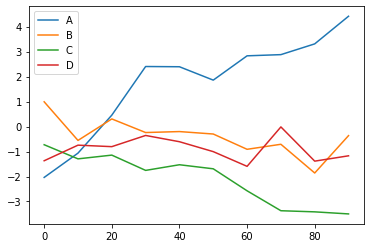

In [391]:
df.plot.line()

<AxesSubplot:>

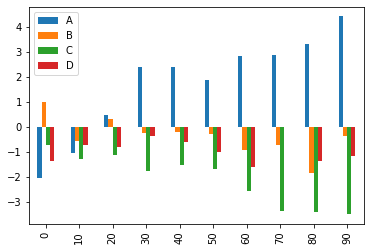

In [392]:
df.plot.bar()

<AxesSubplot:>

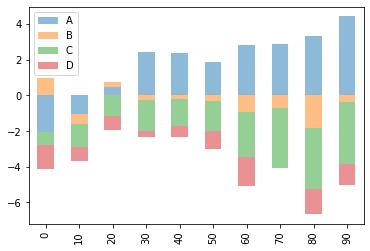

In [393]:
df.plot(kind = 'bar',
        stacked = True,
        alpha = 0.5)

In [394]:
df = pd.DataFrame({'A':np.random.normal(size = 1000)})
df

,A
0,-0.419953
1,-0.572057
2,-0.112548
3,-0.616587
4,0.231349
...,...
995,-0.331343
996,-0.244949
997,-0.327803
998,-0.323189


<AxesSubplot:ylabel='Frequency'>

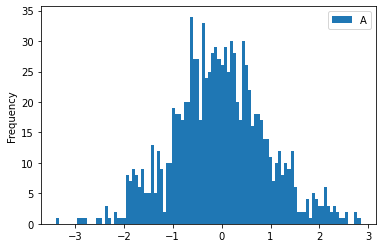

In [395]:
df.plot.hist(bins = 100)

<AxesSubplot:ylabel='Density'>

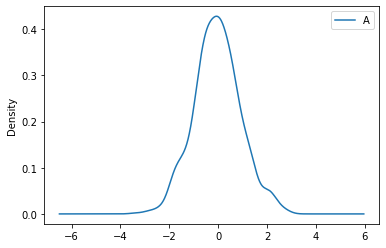

In [396]:
df.plot.density()

<AxesSubplot:ylabel='Density'>

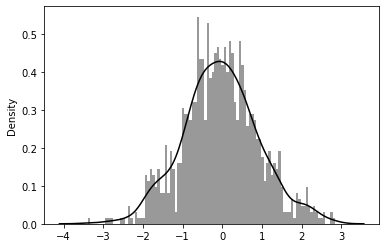

In [397]:
sns.distplot(df, bins = 100, color = 'k')

## seaborn

In [398]:
df = pd.DataFrame({'A':['one','two','three','four','five'] * 20,
                   'B':['Y','N'] * 50,
                   'C':np.random.random(100),
                   'D':np.random.randn(100)})
df

,A,B,C,D
0,one,Y,0.773188,2.079537
1,two,N,0.622234,0.519760
2,three,Y,0.193795,0.367352
3,four,N,0.093767,-0.170953
4,five,Y,0.632400,-0.113870
...,...,...,...,...
95,one,N,0.462890,0.368115
96,two,Y,0.208586,-1.362434
97,three,N,0.779526,-0.329212
98,four,Y,0.141292,-0.649368


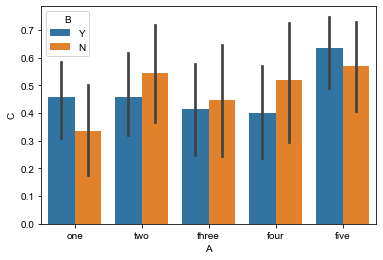

In [399]:
sns.barplot(data = df,
            x = 'A',
            y = 'C',
            hue = 'B')

sns.set(style = 'darkgrid')

In [400]:
df = pd.DataFrame({'A':np.random.normal(size = 1000),
                   'B':np.random.normal(size = 1000) * 2,
                   'C':np.random.normal(size = 1000) * 1.4 + 1,
                   'D':np.random.normal(size = 1000) /3 + 4,
                   'E':np.random.normal(size = 1000) ** 2})
df

,A,B,C,D,E
0,-0.261939,0.967971,1.356368,3.562447,0.000545
1,1.113586,0.035710,2.309961,3.480192,1.756330
2,0.088484,2.691140,0.751616,3.635306,0.000048
3,0.140975,1.359178,1.430904,3.766339,0.347614
4,-0.948368,-0.284896,2.478768,3.994070,0.002332
...,...,...,...,...,...
995,-0.112442,2.825851,1.134221,4.113989,0.258612
996,1.823103,-2.090380,0.532202,4.622422,1.869009
997,0.569827,-0.442206,1.132595,4.012295,1.005698
998,-0.063288,-0.234038,2.799413,3.833011,0.424294


<AxesSubplot:xlabel='A', ylabel='B'>

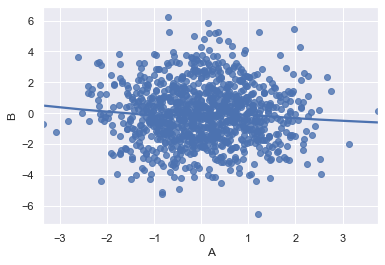

In [401]:
sns.regplot(data = df, x = 'A', y = 'B', lowess = True)

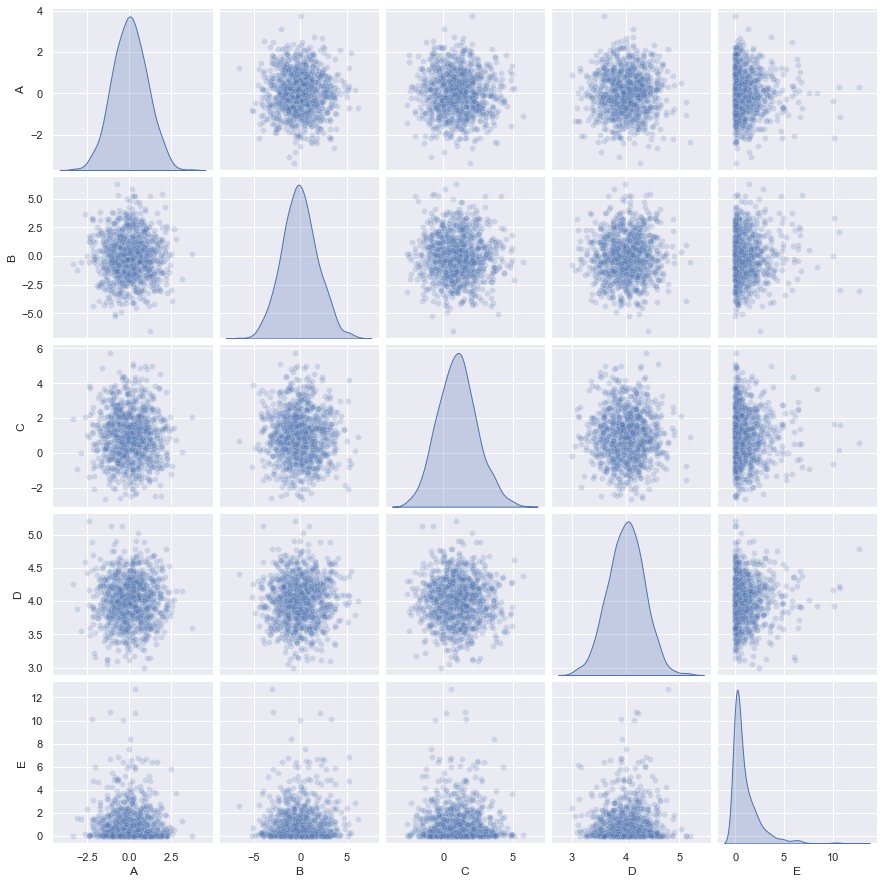

In [402]:
sns.pairplot(data = df, diag_kind = 'kde', plot_kws = {'alpha':0.2})

In [403]:
df = pd.DataFrame({'A':['Yes','No'] * 350,
                   'B':['Mon','Tue','Wed','Thu','Fri','Sat','Sun'] * 100,
                   'C':['Big','Small'] * 350,
                   'D':np.random.normal(size = 700)})
df

,A,B,C,D
0,Yes,Mon,Big,-0.586584
1,No,Tue,Small,-1.598270
2,Yes,Wed,Big,-0.578089
3,No,Thu,Small,-0.982199
4,Yes,Fri,Big,-0.951050
...,...,...,...,...
695,No,Wed,Small,-1.033155
696,Yes,Thu,Big,0.110033
697,No,Fri,Small,-0.955188
698,Yes,Sat,Big,1.190189


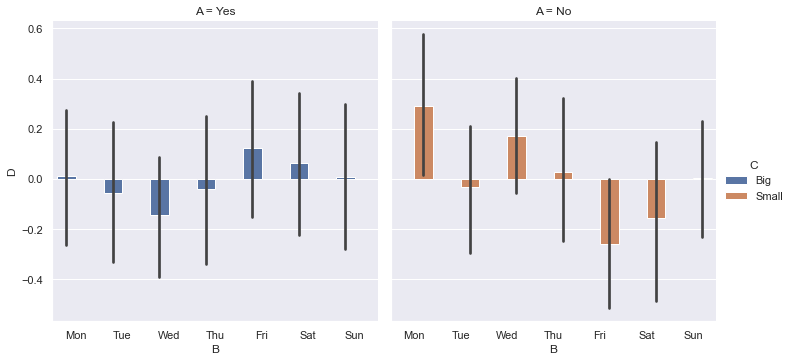

In [404]:
sns.catplot(data = df, x = 'B', y = 'D', hue = 'C', col = 'A', kind = 'bar')

# 15. Modeling

## pandas

In [405]:
df = pd.DataFrame({'x0':[1,2,3,4,5],
                   'x1':[0.01,-0.01,0.25,-4.1,0],
                   'y':[-1.5,0,3.6,1.3,-2],
                   'category':['a','b','a','a','b']})
df

,x0,x1,y,category
0,1,0.01,-1.5,a
1,2,-0.01,0.0,b
2,3,0.25,3.6,a
3,4,-4.10,1.3,a
4,5,0.00,-2.0,b


In [406]:
df.values

array([[1, 0.01, -1.5, 'a'],
       [2, -0.01, 0.0, 'b'],
       [3, 0.25, 3.6, 'a'],
       [4, -4.1, 1.3, 'a'],
       [5, 0.0, -2.0, 'b']], dtype=object)

In [407]:
type(df.values)

numpy.ndarray

In [408]:
df.loc[:,['x0','x1']].values

array([[ 1.  ,  0.01],
       [ 2.  , -0.01],
       [ 3.  ,  0.25],
       [ 4.  , -4.1 ],
       [ 5.  ,  0.  ]])

In [409]:
df['category'] = pd.Categorical(values = ['a','b','a','a','b'],
                                categories = ['a','b'])
df

,x0,x1,y,category
0,1,0.01,-1.5,a
1,2,-0.01,0.0,b
2,3,0.25,3.6,a
3,4,-4.10,1.3,a
4,5,0.00,-2.0,b


In [410]:
dummies = pd.get_dummies(df.category, prefix = 'category')
df = df.drop('category', axis = 1).join(dummies)
df

,x0,x1,y,category_a,category_b
0,1,0.01,-1.5,1,0
1,2,-0.01,0.0,0,1
2,3,0.25,3.6,1,0
3,4,-4.10,1.3,1,0
4,5,0.00,-2.0,0,1


## Patsy

In [411]:
import patsy

In [412]:
df

,x0,x1,y,category_a,category_b
0,1,0.01,-1.5,1,0
1,2,-0.01,0.0,0,1
2,3,0.25,3.6,1,0
3,4,-4.10,1.3,1,0
4,5,0.00,-2.0,0,1


In [413]:
y, X = patsy.dmatrices('y ~ x0 + x1', data = df)

In [414]:
y, X

(DesignMatrix with shape (5, 1)
      y
   -1.5
    0.0
    3.6
    1.3
   -2.0
   Terms:
     'y' (column 0),
 DesignMatrix with shape (5, 3)
   Intercept  x0     x1
           1   1   0.01
           1   2  -0.01
           1   3   0.25
           1   4  -4.10
           1   5   0.00
   Terms:
     'Intercept' (column 0)
     'x0' (column 1)
     'x1' (column 2))

In [415]:
np.asarray(y), np.asarray(X)

(array([[-1.5],
        [ 0. ],
        [ 3.6],
        [ 1.3],
        [-2. ]]),
 array([[ 1.  ,  1.  ,  0.01],
        [ 1.  ,  2.  , -0.01],
        [ 1.  ,  3.  ,  0.25],
        [ 1.  ,  4.  , -4.1 ],
        [ 1.  ,  5.  ,  0.  ]]))

In [416]:
np.linalg.lstsq(X, y, rcond = None)

(array([[ 0.31290976],
        [-0.07910564],
        [-0.26546384]]),
 array([19.63791494]),
 3,
 array([8.03737688, 3.38335321, 0.90895207]))

In [417]:
y, X = patsy.dmatrices('y ~ x0 + np.log(np.abs(x1) + 1)', df)
y, X

(DesignMatrix with shape (5, 1)
      y
   -1.5
    0.0
    3.6
    1.3
   -2.0
   Terms:
     'y' (column 0),
 DesignMatrix with shape (5, 3)
   Intercept  x0  np.log(np.abs(x1) + 1)
           1   1                 0.00995
           1   2                 0.00995
           1   3                 0.22314
           1   4                 1.62924
           1   5                 0.00000
   Terms:
     'Intercept' (column 0)
     'x0' (column 1)
     'np.log(np.abs(x1) + 1)' (column 2))

In [418]:
y, X = patsy.dmatrices('y ~ standardize(x0) + center(x1)', df)
y, X

(DesignMatrix with shape (5, 1)
      y
   -1.5
    0.0
    3.6
    1.3
   -2.0
   Terms:
     'y' (column 0),
 DesignMatrix with shape (5, 3)
   Intercept  standardize(x0)  center(x1)
           1         -1.41421        0.78
           1         -0.70711        0.76
           1          0.00000        1.02
           1          0.70711       -3.33
           1          1.41421        0.77
   Terms:
     'Intercept' (column 0)
     'standardize(x0)' (column 1)
     'center(x1)' (column 2))

## statsmodels

In [419]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [420]:
sm.OLS(df['y'], df[['x0','x1']]).fit().summary()

/Users/boyuan.li/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.056
Model:                            OLS   Adj. R-squared (uncentered):             -0.573
Method:                 Least Squares   F-statistic:                            0.08931
Date:                Sun, 21 Nov 2021   Prob (F-statistic):                       0.917
Time:                        10:01:02   Log-Likelihood:                         -10.526
No. Observations:                   5   AIC:                                      25.05
Df Residuals:                       3   BIC:                                      24.27
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x0             0.0093      0.403      0.023      0.983      -1.274       1.292
x1            -0.2549      0.728     -0.350      0.749      -2.571       2.061
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.642
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.649
Skew:                           0.838   Prob(JB):                        0.723
Kurtosis:                       2.442   Cond. No.                         2.32
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [421]:
sm.OLS(df['y'], df[['x0','x1']]).fit().predict([1,2])

array([-0.50045418])

In [422]:
smf.ols('y ~ x0 + x1', data = df).fit().summary()

/Users/boyuan.li/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                 -0.915
Method:                 Least Squares   F-statistic:                   0.04431
Date:                Sun, 21 Nov 2021   Prob (F-statistic):              0.958
Time:                        10:01:02   Log-Likelihood:                -10.515
No. Observations:                   5   AIC:                             27.03
Df Residuals:                       2   BIC:                             25.86
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3129      3.313      0.094      0.933     -13.940      14.566
x0            -0.0791      1.057     -0.075      0.947      -4.628       4.470
x1            -0.2655      0.896     -0.296      0.795      -4.122       3.592
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.653
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.702
Skew:                           0.875   Prob(JB):                        0.704
Kurtosis:                       2.447   Cond. No.                         8.84
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [423]:
sm.tsa.AR(np.random.randn(100)).fit(MAXLAGS = 5).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               AR Model Results                               
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                         AR(12)   Log Likelihood                -115.421
Method:                          cmle   S.D. of innovations              0.898
Date:                Sun, 21 Nov 2021   AIC                              0.104
Time:                        10:01:02   BIC                              0.498
Sample:                             0   HQIC                             0.262
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0093      0.106     -0.087      0.931      -0.218       0.199
L1.y           0.0830      0.115      0.721      0.471      -0.143       0.309
L2.y          -0.1277      0.112     -1.136      0.256      -0.348       0.093
L3.y           0.0411      0.116      0.354      0.723      -0.186       0.268
L4.y           0.1288      0.117      1.104      0.270      -0.100       0.358
L5.y          -0.0039      0.115     -0.034      0.973      -0.229       0.221
L6.y          -0.0395      0.117     -0.339      0.735      -0.268       0.189
L7.y           0.0712      0.117      0.610      0.542      -0.158       0.300
L8.y          -0.1431      0.116     -1.230      0.219      -0.371       0.085
L9.y          -0.0864      0.121     -0.713      0.476      -0.324       0.151
L10.y          0.0391      0.120      0.326      0.744      -0.196       0.274
L11.y         -0.1731      0.118     -1.462      0.144      -0.405       0.059
L12.y          0.0031      0.122      0.026      0.980      -0.236       0.242
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -1.2054           -0.0000j            1.2054           -0.5000
AR.2            -0.9699           -0.6065j            1.1439           -0.4111
AR.3            -0.9699           +0.6065j            1.1439            0.4111
AR.4            -0.3530           -1.0624j            1.1195           -0.3010
AR.5            -0.3530           +1.0624j            1.1195            0.3010
AR.6             1.0758           -0.3345j            1.1266           -0.0480
AR.7             1.0758           +0.3345j            1.1266            0.0480
AR.8             0.7485           -0.9977j            1.2472           -0.1476
AR.9             0.7485           +0.9977j            1.2472            0.1476
AR.10            0.2099           -1.2008j            1.2190           -0.2225
AR.11            0.2099           +1.2008j            1.2190            0.2225
AR.12           55.1901           -0.0000j           55.1901           -0.0000
------------------------------------------------------------------------------
"""

## sklearn

In [424]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [425]:
%%script echo skipping
model = LogisticRegression()
model.fit(X_train, y_train)
model.coef_
model.predict()

scores = cross_val_score(model, X_train, y_train, cv = 5)

skipping
